In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import datetime
import time
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import lightgbm as lbg
plt.style.use('ggplot')
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## 1. Data Preparation

### 1.1 Import Data

In [4]:
df = pd.read_csv('datatest.csv')
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CREDIT_TYPE,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_ANNUITY,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,104852,1,M,Y,Y,1,Consumer credit,180000.0,Unaccompanied,Commercial associate,...,1,0,1,Laborers,-2921,0,0,NaN,69885.0,0.0
1,103790,0,F,N,Y,0,Credit card,90000.0,Unaccompanied,Working,...,1,0,0,Sales staff,-2920,0,0,NaN,225000.0,0.0
2,145763,0,F,N,Y,0,Credit card,225000.0,Unaccompanied,Working,...,1,0,0,NaN,-2919,0,0,NaN,90000.0,0.0
3,148467,0,F,N,Y,0,Consumer credit,247500.0,Unaccompanied,Commercial associate,...,1,0,0,Accountants,-2918,0,0,NaN,36900.0,0.0
4,149641,0,M,N,N,0,Consumer credit,202500.0,Unaccompanied,Working,...,1,0,0,Laborers,-2918,0,0,NaN,58941.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,163624,0,F,Y,Y,1,Consumer credit,135000.0,Unaccompanied,Working,...,1,0,0,NaN,-9,0,0,NaN,45000.0,0.0
11649,169955,0,M,Y,Y,0,Consumer credit,202500.0,Unaccompanied,Commercial associate,...,1,0,0,Cooking staff,-8,0,0,NaN,13500.0,0.0
11650,142348,0,M,N,Y,0,Microloan,90000.0,Unaccompanied,Working,...,1,0,0,Laborers,-6,0,0,NaN,9000.0,0.0
11651,155957,0,M,Y,Y,0,Consumer credit,202500.0,Unaccompanied,Commercial associate,...,1,0,0,Security staff,-5,0,0,NaN,22500.0,0.0


### 1.2 Data Cleaning

#### a. Missing Value

In [5]:
df["NAME_TYPE_SUITE"].fillna(value='Unaccompanied', inplace=True)
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CREDIT_TYPE,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_ANNUITY,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,104852,1,M,Y,Y,1,Consumer credit,180000.0,Unaccompanied,Commercial associate,...,1,0,1,Laborers,-2921,0,0,NaN,69885.0,0.0
1,103790,0,F,N,Y,0,Credit card,90000.0,Unaccompanied,Working,...,1,0,0,Sales staff,-2920,0,0,NaN,225000.0,0.0
2,145763,0,F,N,Y,0,Credit card,225000.0,Unaccompanied,Working,...,1,0,0,NaN,-2919,0,0,NaN,90000.0,0.0
3,148467,0,F,N,Y,0,Consumer credit,247500.0,Unaccompanied,Commercial associate,...,1,0,0,Accountants,-2918,0,0,NaN,36900.0,0.0
4,149641,0,M,N,N,0,Consumer credit,202500.0,Unaccompanied,Working,...,1,0,0,Laborers,-2918,0,0,NaN,58941.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,163624,0,F,Y,Y,1,Consumer credit,135000.0,Unaccompanied,Working,...,1,0,0,NaN,-9,0,0,NaN,45000.0,0.0
11649,169955,0,M,Y,Y,0,Consumer credit,202500.0,Unaccompanied,Commercial associate,...,1,0,0,Cooking staff,-8,0,0,NaN,13500.0,0.0
11650,142348,0,M,N,Y,0,Microloan,90000.0,Unaccompanied,Working,...,1,0,0,Laborers,-6,0,0,NaN,9000.0,0.0
11651,155957,0,M,Y,Y,0,Consumer credit,202500.0,Unaccompanied,Commercial associate,...,1,0,0,Security staff,-5,0,0,NaN,22500.0,0.0


In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_ANNUITY,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
count,11653.000000,11653.000000,11653.000000,1.165300e+04,11653.000000,11653.0,11653.000000,11653.0,11653.000000,11653.000000,11653.000000,11653.000000,11653.000000,0.0,1.165300e+04,11653.000000
mean,137838.409251,0.071999,0.452158,2.102416e+05,-16222.154295,1.0,0.823736,1.0,0.295460,0.067794,-1149.634515,0.892817,0.007123,NaN,3.546047e+05,16.128281
std,21618.720940,0.258497,0.736160,1.876372e+06,4211.011396,0.0,0.381061,0.0,0.456269,0.251402,802.724024,37.535960,0.105792,NaN,9.044206e+05,1007.445399
min,100016.000000,0.000000,0.000000,3.150000e+04,-25151.000000,1.0,0.000000,1.0,0.000000,0.000000,-2921.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000
25%,118519.000000,0.000000,0.000000,1.125000e+05,-19856.000000,1.0,1.000000,1.0,0.000000,0.000000,-1689.000000,0.000000,0.000000,NaN,5.450598e+04,0.000000
50%,138048.000000,0.000000,0.000000,1.575000e+05,-15870.000000,1.0,1.000000,1.0,0.000000,0.000000,-989.000000,0.000000,0.000000,NaN,1.263690e+05,0.000000
75%,156669.000000,0.000000,1.000000,2.250000e+05,-12780.000000,1.0,1.000000,1.0,1.000000,0.000000,-470.000000,0.000000,0.000000,NaN,3.150000e+05,0.000000
max,175976.000000,1.000000,4.000000,1.170000e+08,-7917.000000,1.0,1.000000,1.0,1.000000,1.000000,-5.000000,2541.000000,4.000000,NaN,3.199500e+07,96795.000000


In [7]:
data = df.iloc[: ,1:].drop(columns=['AMT_ANNUITY','FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE']).dropna()
data

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CREDIT_TYPE,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,1,M,Y,Y,1,Consumer credit,180000.0,Unaccompanied,Commercial associate,Secondary / secondary special,-16195,0,1,Laborers,-2921,0,0,69885.000,0.0
1,0,F,N,Y,0,Credit card,90000.0,Unaccompanied,Working,Secondary / secondary special,-20543,0,0,Sales staff,-2920,0,0,225000.000,0.0
3,0,F,N,Y,0,Consumer credit,247500.0,Unaccompanied,Commercial associate,Higher education,-14881,0,0,Accountants,-2918,0,0,36900.000,0.0
4,0,M,N,N,0,Consumer credit,202500.0,Unaccompanied,Working,Higher education,-17552,0,0,Laborers,-2918,0,0,58941.000,0.0
5,0,F,Y,Y,0,Consumer credit,157500.0,Unaccompanied,State servant,Secondary / secondary special,-17889,0,1,Laborers,-2917,0,0,279000.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,1,F,Y,Y,0,Consumer credit,67500.0,Family,Working,Higher education,-19731,0,0,Laborers,-9,0,0,187920.000,0.0
11647,0,F,Y,Y,0,Consumer credit,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,-20306,1,0,Managers,-9,0,0,143057.565,0.0
11649,0,M,Y,Y,0,Consumer credit,202500.0,Unaccompanied,Commercial associate,Higher education,-11403,0,0,Cooking staff,-8,0,0,13500.000,0.0
11650,0,M,N,Y,0,Microloan,90000.0,Unaccompanied,Working,Secondary / secondary special,-11988,0,0,Laborers,-6,0,0,9000.000,0.0


In [6]:
data.dtypes

TARGET                      int64
CODE_GENDER                object
FLAG_OWN_CAR               object
FLAG_OWN_REALTY            object
CNT_CHILDREN                int64
CREDIT_TYPE                object
AMT_INCOME_TOTAL          float64
NAME_TYPE_SUITE            object
NAME_INCOME_TYPE           object
NAME_EDUCATION_TYPE        object
DAYS_BIRTH                  int64
FLAG_PHONE                  int64
FLAG_EMAIL                  int64
OCCUPATION_TYPE            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_OVERDUE    float64
dtype: object

In [7]:
data.OCCUPATION_TYPE.value_counts()

Laborers                 1770
Core staff               1460
Sales staff              1178
Managers                  859
Drivers                   629
Accountants               457
High skill tech staff     409
Security staff            297
Medicine staff            279
Cooking staff             158
Cleaning staff            150
HR staff                   67
Secretaries                66
Low-skill Laborers         66
Private service staff      53
Waiters/barmen staff       40
Realty agents              26
IT staff                   19
Name: OCCUPATION_TYPE, dtype: int64

In [8]:
data.CREDIT_TYPE.value_counts()

Consumer credit                           5763
Credit card                               1891
Car loan                                   180
Mortgage                                    94
Microloan                                   37
Another type of loan                         7
Loan for business development                6
Loan for working capital replenishment       3
Unknown type of loan                         2
Name: CREDIT_TYPE, dtype: int64

In [9]:
data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    5356
Higher education                 2311
Incomplete higher                 263
Lower secondary                    46
Academic degree                     7
Name: NAME_EDUCATION_TYPE, dtype: int64

In [10]:
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      6624
Family              915
Spouse, partner     304
Children             86
Other_B              32
Other_A              21
Group of people       1
Name: NAME_TYPE_SUITE, dtype: int64

In [8]:
data.isnull()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CREDIT_TYPE,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11647,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11649,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,FLAG_PHONE,FLAG_EMAIL,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
count,7983.000000,7983.000000,7.983000e+03,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7.983000e+03,7983.000000
mean,0.078542,0.549668,2.308056e+05,-15005.133659,0.293248,0.070775,-1154.076788,0.785920,0.008518,3.828534e+05,15.809098
std,0.269039,0.776766,2.266107e+06,3496.727376,0.455280,0.256465,804.422369,37.551657,0.118148,1.013598e+06,1115.106191
min,0.000000,0.000000,3.150000e+04,-24705.000000,0.000000,0.000000,-2921.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.260000e+05,-17693.000000,0.000000,0.000000,-1698.500000,0.000000,0.000000,5.358825e+04,0.000000
50%,0.000000,0.000000,1.665000e+05,-14653.000000,0.000000,0.000000,-994.000000,0.000000,0.000000,1.278135e+05,0.000000
75%,0.000000,1.000000,2.250000e+05,-12190.000000,1.000000,0.000000,-469.000000,0.000000,0.000000,3.375000e+05,0.000000
max,1.000000,4.000000,1.170000e+08,-7917.000000,1.000000,1.000000,-5.000000,2541.000000,4.000000,3.199500e+07,96795.000000


In [15]:
data.isnull().sum()

TARGET                    0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
CREDIT_TYPE               0
AMT_INCOME_TOTAL          0
NAME_TYPE_SUITE           0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
DAYS_BIRTH                0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_OVERDUE    0
dtype: int64

In [16]:
df.isnull().mean()

SK_ID_CURR                0.00000
TARGET                    0.00000
CODE_GENDER               0.00000
FLAG_OWN_CAR              0.00000
FLAG_OWN_REALTY           0.00000
CNT_CHILDREN              0.00000
CREDIT_TYPE               0.00000
AMT_INCOME_TOTAL          0.00000
NAME_TYPE_SUITE           0.00000
NAME_INCOME_TYPE          0.00000
NAME_EDUCATION_TYPE       0.00000
DAYS_BIRTH                0.00000
FLAG_MOBIL                0.00000
FLAG_EMP_PHONE            0.00000
FLAG_CONT_MOBILE          0.00000
FLAG_PHONE                0.00000
FLAG_EMAIL                0.00000
OCCUPATION_TYPE           0.31494
DAYS_CREDIT               0.00000
CREDIT_DAY_OVERDUE        0.00000
CNT_CREDIT_PROLONG        0.00000
AMT_ANNUITY               1.00000
AMT_CREDIT_SUM            0.00000
AMT_CREDIT_SUM_OVERDUE    0.00000
dtype: float64

#### b. Xử lý Outliers

In [23]:
CNT_CHILDREN_median = data[data.CNT_CHILDREN <= data.CNT_CHILDREN.quantile(0.9988)].CNT_CHILDREN.median()
data.loc[data.CNT_CHILDREN >= data.CNT_CHILDREN.quantile(0.9988), 'CNT_CHILDREN'] = CNT_CHILDREN_median
data.loc[data.AMT_INCOME_TOTAL >= data.AMT_INCOME_TOTAL.quantile(0.971), 'AMT_INCOME_TOTAL'] = data.AMT_INCOME_TOTAL.median()
data.loc[data.AMT_CREDIT_SUM >= data.AMT_CREDIT_SUM.quantile(0.713), 'AMT_CREDIT_SUM'] = data.AMT_CREDIT_SUM.median()


<AxesSubplot:>

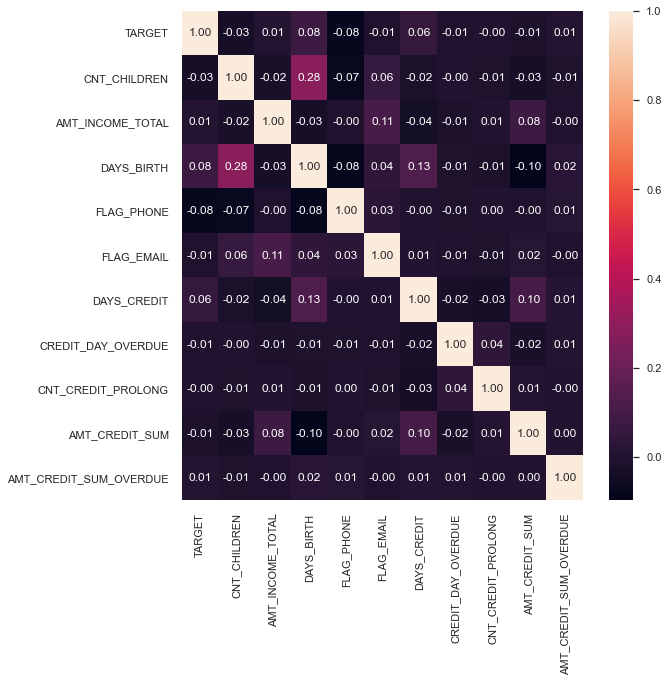

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), fmt='.2f', annot= True)

In [15]:
data.columns

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'CREDIT_TYPE', 'AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE'],
      dtype='object')

<AxesSubplot:>

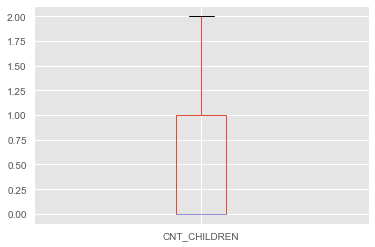

In [16]:
data.CNT_CHILDREN.plot.box()

<AxesSubplot:>

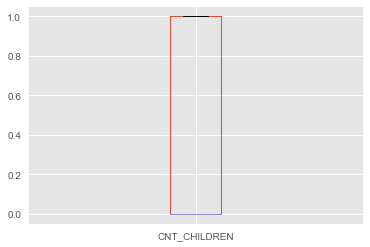

In [17]:
data[data.CNT_CHILDREN < data.CNT_CHILDREN.quantile(0.9988)].CNT_CHILDREN.plot.box()

<AxesSubplot:>

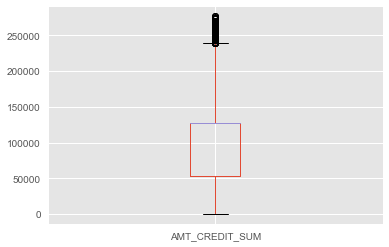

In [18]:
data.AMT_CREDIT_SUM.plot.box()

<AxesSubplot:>

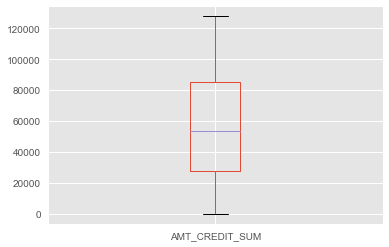

In [19]:
data[data.AMT_CREDIT_SUM < data.AMT_CREDIT_SUM.quantile(0.713)].AMT_CREDIT_SUM.plot.box()

<AxesSubplot:>

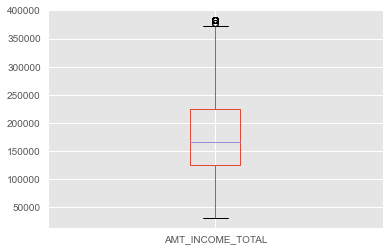

In [20]:
data.AMT_INCOME_TOTAL.plot.box()

<AxesSubplot:>

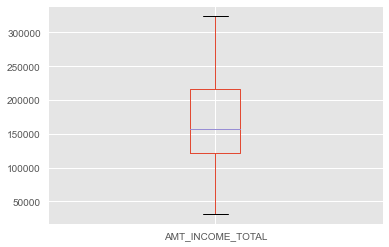

In [21]:
data[data.AMT_INCOME_TOTAL < data.AMT_INCOME_TOTAL.quantile(0.971)].AMT_INCOME_TOTAL.plot.box()

In [22]:
data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,FLAG_PHONE,FLAG_EMAIL,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
count,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000,7983.000000
mean,0.078542,0.494801,177215.372943,-15005.133659,0.293248,0.070775,-1154.076788,0.785920,0.008518,105265.280817,15.809098
std,0.269039,0.701105,71301.273889,3496.727376,0.455280,0.256465,804.422369,37.551657,0.118148,61991.158069,1115.106191
min,0.000000,0.000000,31500.000000,-24705.000000,0.000000,0.000000,-2921.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,126000.000000,-17693.000000,0.000000,0.000000,-1698.500000,0.000000,0.000000,53588.250000,0.000000
50%,0.000000,0.000000,166500.000000,-14653.000000,0.000000,0.000000,-994.000000,0.000000,0.000000,127813.500000,0.000000
75%,0.000000,1.000000,225000.000000,-12190.000000,1.000000,0.000000,-469.000000,0.000000,0.000000,127813.500000,0.000000
max,1.000000,2.000000,382500.000000,-7917.000000,1.000000,1.000000,-5.000000,2541.000000,4.000000,276921.000000,96795.000000


<AxesSubplot:>

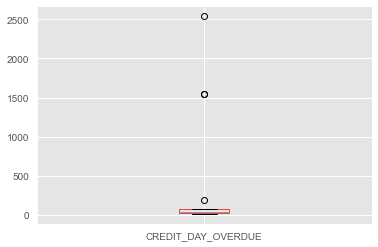

In [23]:
data[data.CREDIT_DAY_OVERDUE > data.CREDIT_DAY_OVERDUE.quantile(0.9)].CREDIT_DAY_OVERDUE.plot.box()

<AxesSubplot:>

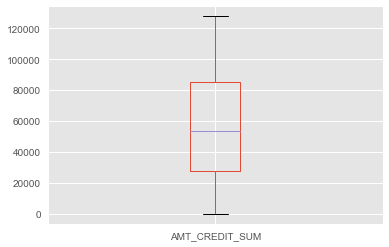

In [24]:
data[data.AMT_CREDIT_SUM < data.AMT_CREDIT_SUM.quantile(0.74)].AMT_CREDIT_SUM.plot.box()

<AxesSubplot:>

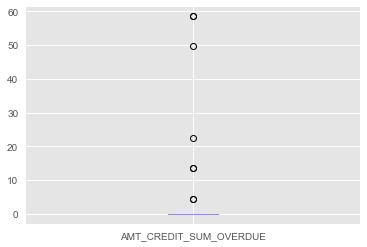

In [14]:
data[data.AMT_CREDIT_SUM_OVERDUE < data.AMT_CREDIT_SUM_OVERDUE.quantile(0.998955)].AMT_CREDIT_SUM_OVERDUE.plot.box()

In [26]:
df.TARGET.value_counts()

0    10814
1      839
Name: TARGET, dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
data.columns

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'CREDIT_TYPE', 'AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE'],
      dtype='object')

In [32]:
data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      6624
Family              915
Spouse, partner     304
Children             86
Other_B              32
Other_A              21
Group of people       1
Name: NAME_TYPE_SUITE, dtype: int64

In [33]:
data.head(4)

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CREDIT_TYPE,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,1,M,Y,Y,1,Consumer credit,180000.0,Unaccompanied,Commercial associate,Secondary / secondary special,-16195,0,1,Laborers,-2921,0,0,69885.0,0.0
1,0,F,N,Y,0,Credit card,90000.0,Unaccompanied,Working,Secondary / secondary special,-20543,0,0,Sales staff,-2920,0,0,225000.0,0.0
3,0,F,N,Y,0,Consumer credit,247500.0,Unaccompanied,Commercial associate,Higher education,-14881,0,0,Accountants,-2918,0,0,36900.0,0.0
4,0,M,N,N,0,Consumer credit,202500.0,Unaccompanied,Working,Higher education,-17552,0,0,Laborers,-2918,0,0,58941.0,0.0


## 2. Exploratory data analyst

In [19]:
df.TARGET.value_counts()

0    10814
1      839
Name: TARGET, dtype: int64

([<matplotlib.patches.Wedge at 0x25abaca1130>,
 [Text(-0.6172995181017408, -0.9104621381207232, 'Có khả năng trả được nợ'),
  Text(0.7295356933777791, 1.076000776992193, 'Có khả năng không trả được nợ')],
 [Text(-0.3367088280554949, -0.4966157117022126, '92.1%'),
  Text(0.4489450420786333, 0.662154324302888, '7.9%')])

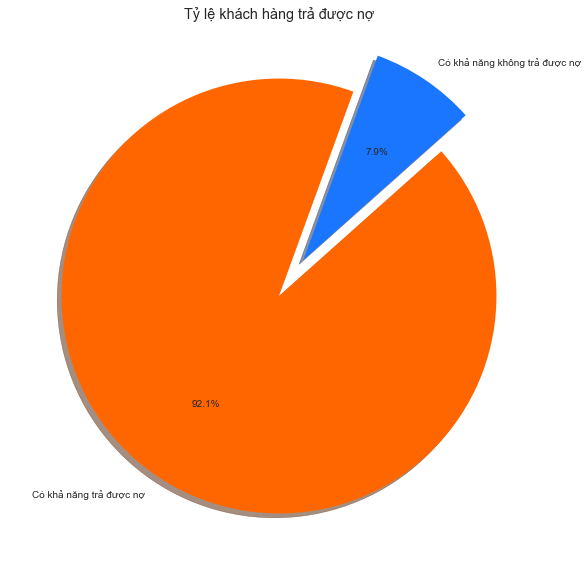

In [18]:
plt.figure(figsize=(10,10))
plt.title('Tỷ lệ khách hàng trả được nợ')
plt.pie(x=data.groupby('TARGET')['TARGET'].count().values, 
        explode=(0,0.2), 
        labels=['Có khả năng trả được nợ', 'Có khả năng không trả được nợ'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=70,
       colors = ["#ff6600", "#1a75ff"])


[Text(0.5, 0, 'Số con'), Text(0, 0.5, 'Số lượng')]

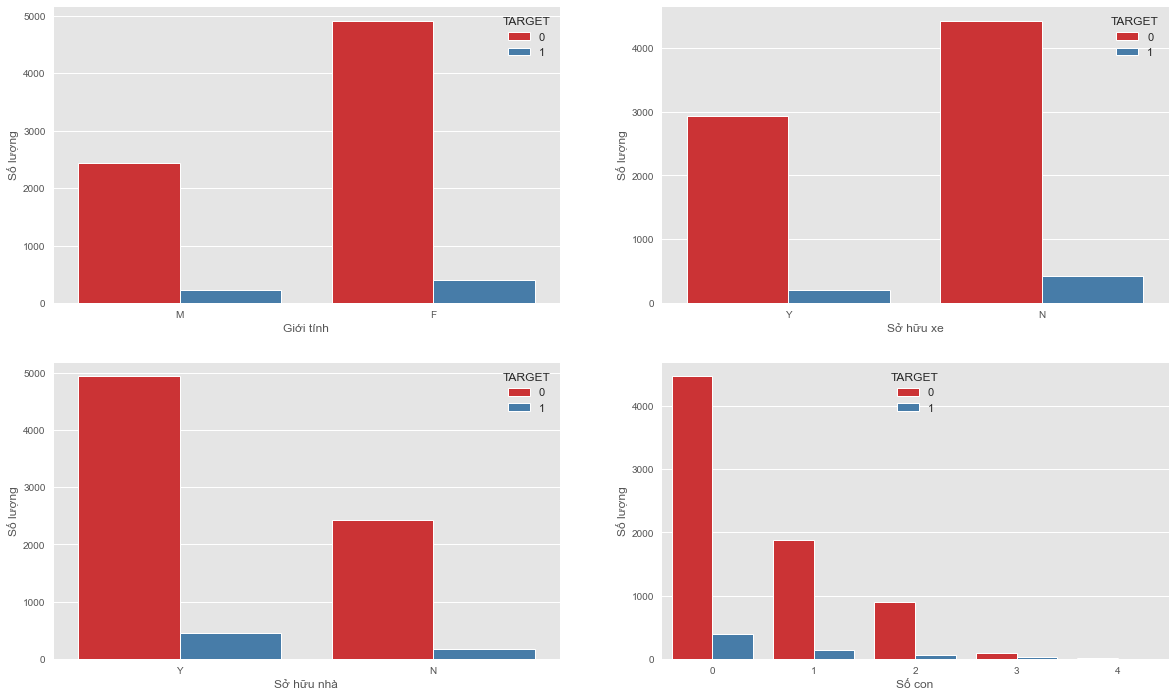

In [20]:
   # We first review the 'Status' relation with categorical variables
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
sns.set_theme(style="white", palette="Set1")

Gender = sns.countplot(x='CODE_GENDER', hue = 'TARGET',data = data, ax=axes[0][0])
Gender.set(xlabel='Giới tính', ylabel='Số lượng')

Car = sns.countplot(x='FLAG_OWN_CAR', hue = 'TARGET',data = data, ax=axes[0][1])
Car.set(xlabel='Sở hữu xe', ylabel='Số lượng')

Realty = sns.countplot(x='FLAG_OWN_REALTY', hue = 'TARGET',data = data, ax=axes[1][0])
Realty.set(xlabel='Sở hữu nhà', ylabel='Số lượng')

Children = sns.countplot(x='CNT_CHILDREN', hue = 'TARGET',data = data, ax=axes[1][1])
Children.set(xlabel='Số con', ylabel='Số lượng')

No handles with labels found to put in legend.


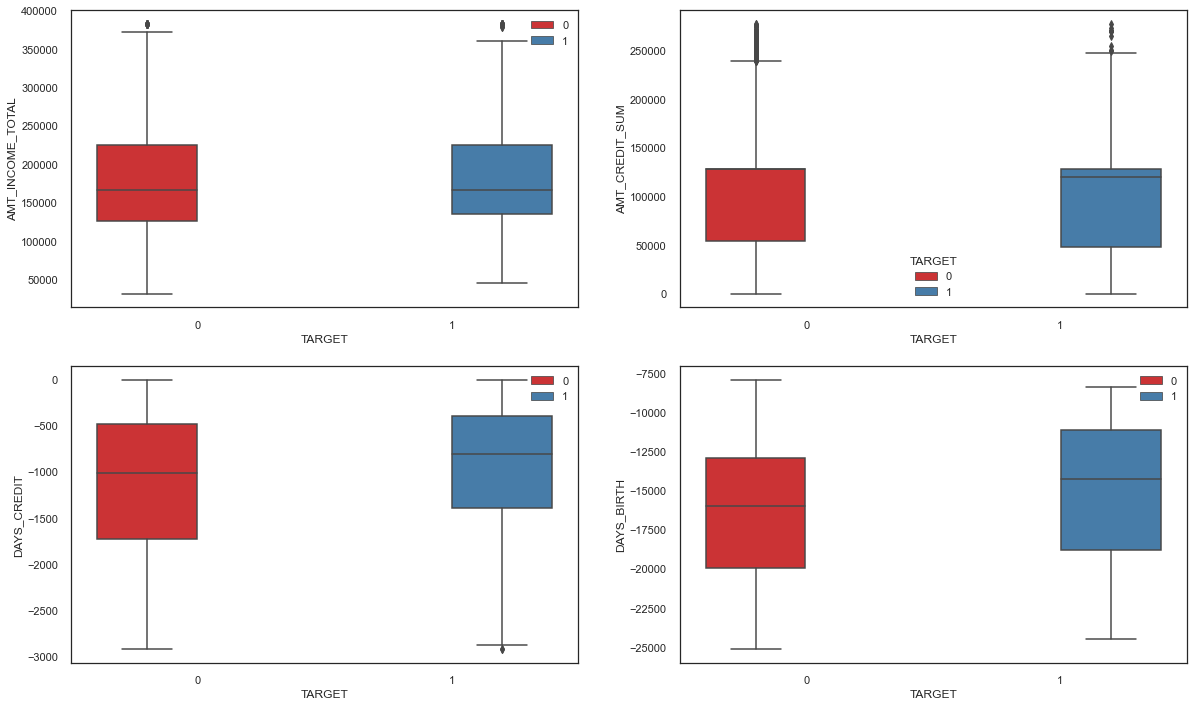

In [25]:
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    #sns.boxplot(y='CNT_CHILDREN',x = 'TARGET', hue = 'TARGET',data = data, ax=axarr[0][0])
    income = sns.boxplot(y='AMT_INCOME_TOTAL',x = 'TARGET', hue = 'TARGET',data = data , ax=axarr[0][0])
    income.legend(loc='best')
    sns.boxplot(y='AMT_CREDIT_SUM',x = 'TARGET', hue = 'TARGET',data = data, ax=axarr[0][1])
    plt.legend(loc='best')
    DAYS_CREDIT = sns.boxplot(y='DAYS_CREDIT',x = 'TARGET', hue = 'TARGET',data = data, ax=axarr[1][0])
    DAYS_CREDIT.legend(loc='best')
    #sns.boxplot(y='AMT_CREDIT_SUM_OVERDUE',x = 'TARGET', hue = 'TARGET',data = df, ax=axarr[2][0])
    #data[data.AMT_CREDIT_SUM < data.AMT_CREDIT_SUM.quantile(0.74)].AMT_CREDIT_SUM.plot.box(ax=axarr[2][0])
    sns.boxplot(y='DAYS_BIRTH',x = 'TARGET', hue = 'TARGET',data = df, ax=axarr[1][1])
    plt.legend(loc='best')

D:\Documents\GitHub\Anacoda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Documents\GitHub\Anacoda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Documents\GitHub\Anacoda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

''

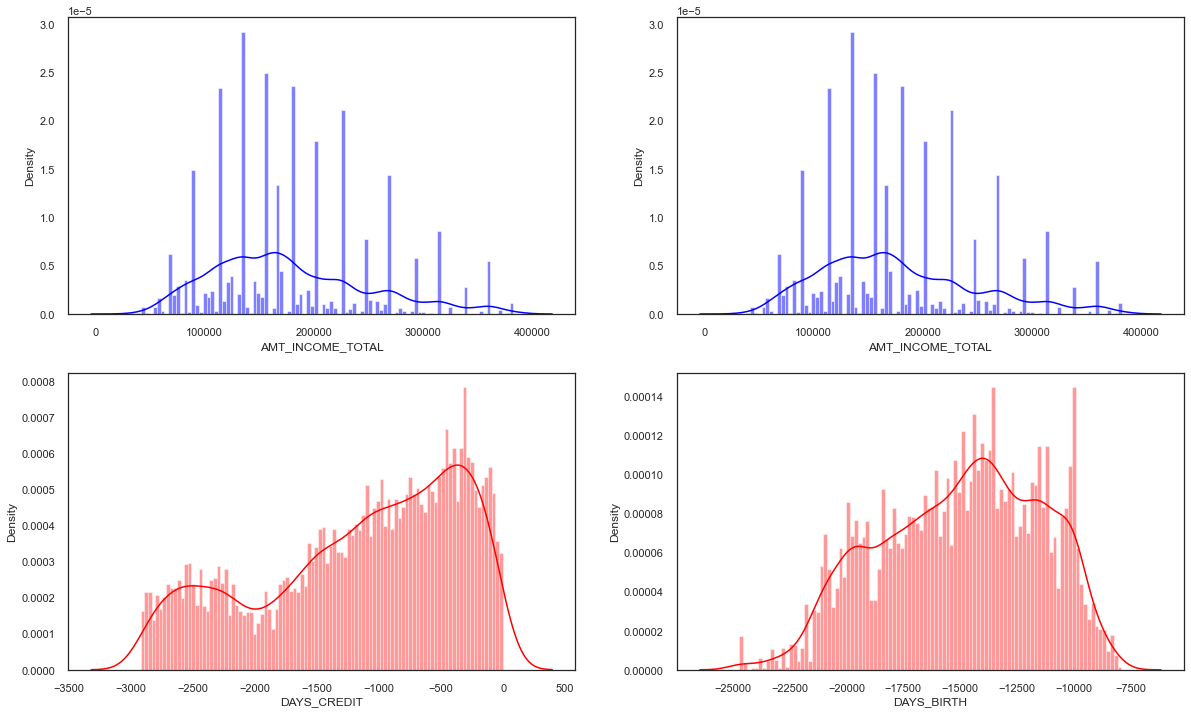

In [86]:
#print(df['AMT_INCOME_TOTAL'].describe())
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
AMT_INCOME_TOTAL = sns.distplot(data['AMT_INCOME_TOTAL'], color='b', bins=100, hist_kws={'alpha': 0.5}, ax=axarr[0][0])
AMT_CREDIT_SUM = sns.distplot(data['AMT_INCOME_TOTAL'], color='b', bins=100, hist_kws={'alpha': 0.5}, ax=axarr[0][1])
DAYS_CREDIT = sns.distplot(data['DAYS_CREDIT'], color='r', bins=100, hist_kws={'alpha': 0.4}, ax=axarr[1][0])
DAYS_BIRTH = sns.distplot(data['DAYS_BIRTH'], color='r', bins=100, hist_kws={'alpha': 0.4}, ax=axarr[1][1])
;

No handles with labels found to put in legend.


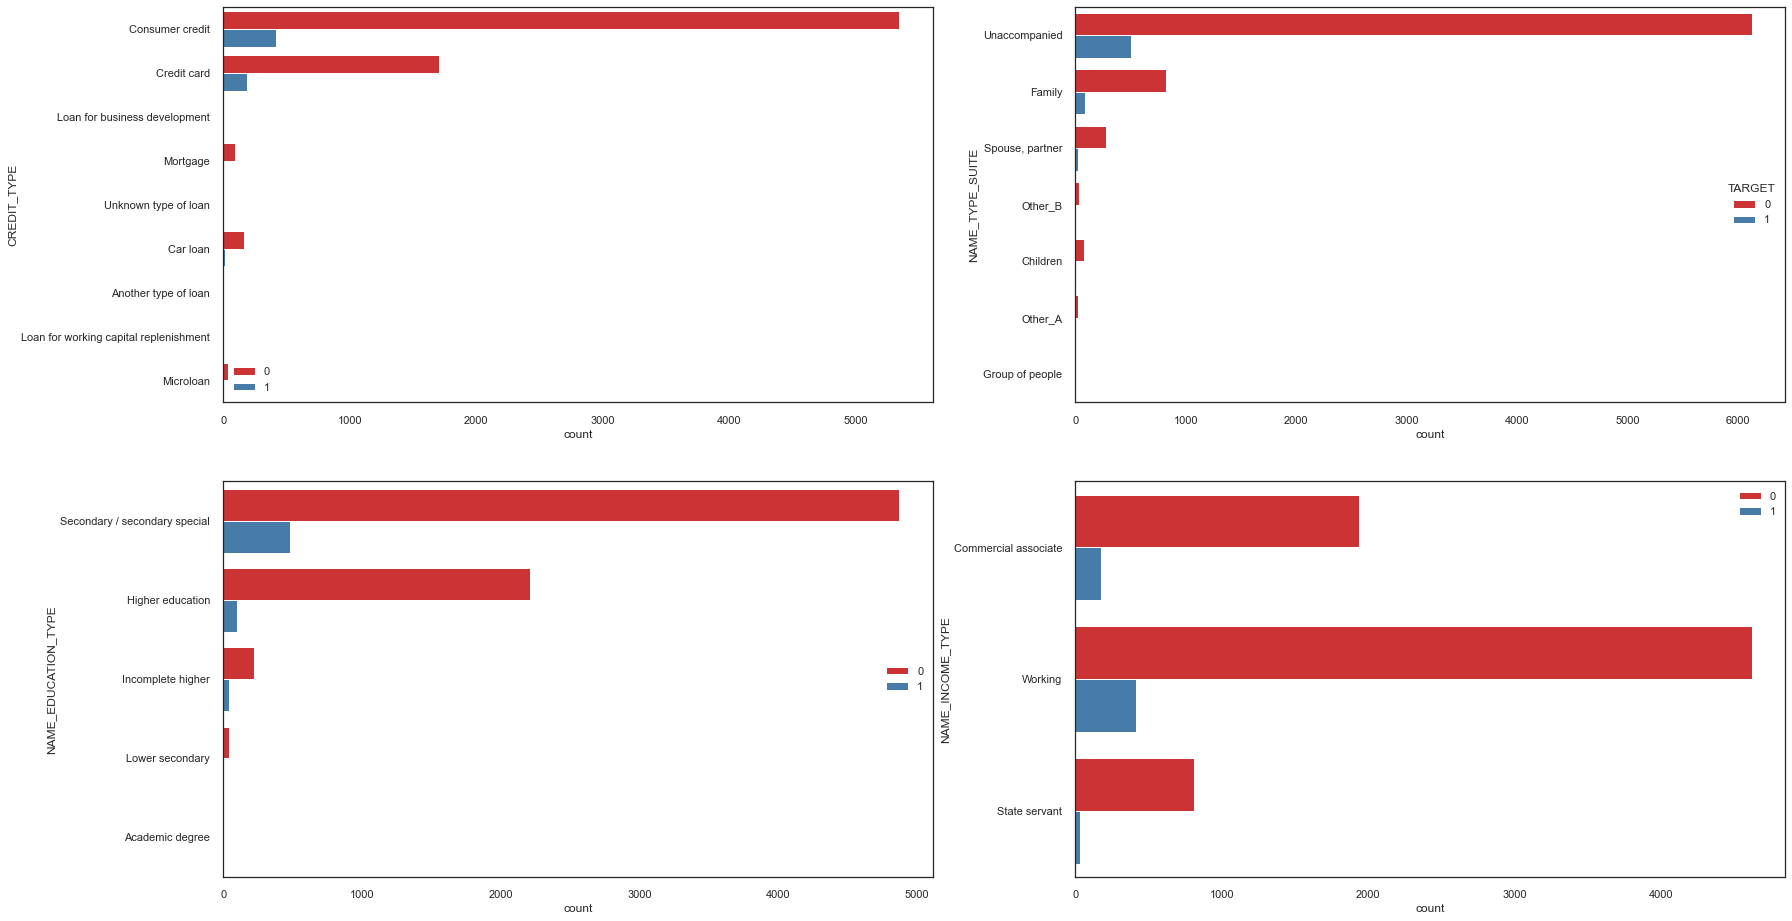

In [83]:
 fig, axarr = plt.subplots(2, 2, figsize=(28, 16))
    
CREDIT_TYPE = sns.countplot(y='CREDIT_TYPE', hue = 'TARGET',data = data , ax=axarr[0][0])
CREDIT_TYPE.legend(loc='best')
sns.countplot(y='NAME_TYPE_SUITE', hue = 'TARGET',data = data, ax=axarr[0][1])
plt.legend(loc='best')
NAME_EDUCATION_TYPE = sns.countplot(y='NAME_EDUCATION_TYPE', hue = 'TARGET',data = data, ax=axarr[1][0])
NAME_EDUCATION_TYPE.legend(loc='best')
sns.countplot(y='NAME_INCOME_TYPE', hue = 'TARGET',data = data, ax=axarr[1][1])
plt.legend(loc='best')

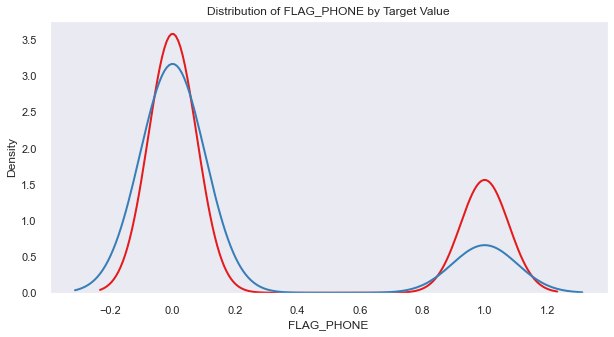

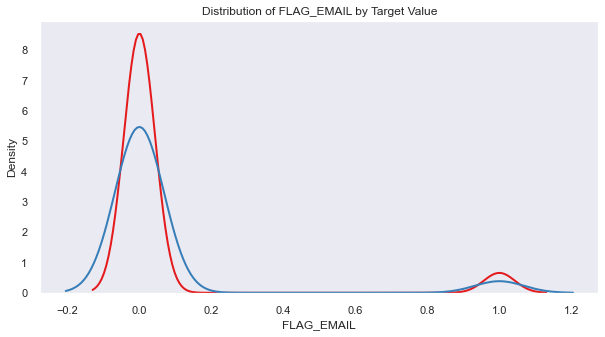

In [27]:
# iterate through the sources
for i, source in enumerate(['FLAG_PHONE','FLAG_EMAIL']):
    
    # create a new subplot for each source
    sns.set_style("dark")
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.0})
    fig, axes = plt.subplots(figsize = (10,5))
    # plot repaid loans
    sns.kdeplot(data.loc[data['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(data.loc[data['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    

## 3. Train Test Split

In [88]:
categorical_col = data.select_dtypes(exclude=[int, float, np.int64, np.float64]).columns.to_list()
categorical_col

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CREDIT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE']

In [91]:
for cat_col in categorical_col:
    data[cat_col] = data[cat_col].astype('category')

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='TARGET'), data.TARGET, 
                                                    test_size=0.2, shuffle=True, stratify=data.TARGET, 
                                                    random_state=4)
valid_size = y_test.shape[0] / y_train.shape[0]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                    test_size=valid_size, shuffle=True, stratify=y_train, 
                                                    random_state=4)

In [93]:
y_test

1461     0
8550     0
8929     0
6794     0
9324     0
        ..
1000     0
2038     0
6409     0
10846    1
4486     0
Name: TARGET, Length: 799, dtype: int64

In [95]:
data.shape

(7983, 19)

In [96]:
y_train.shape[0]

6385

In [97]:
y_test.shape[0]/y_train.shape[0]

0.12513703993735317

## 4. Train Model

In [34]:
!pip install eli5

In [35]:
!pip install xgboost

In [116]:
!pip install lightgbm

### 4.1 Lightboost

In [123]:
train_set = lbg.Dataset(X_train, y_train)
valid_set = lbg.Dataset(X_valid, y_valid)

In [127]:
params = {
    'boosting_type': 'gbdt',#Decision Tree
    'objective': 'binary',#Phân loại 2 
    'learning_rate': 0.001, #Tốc độ học của mô hình
    'metric': ['binary_logloss', 'auc'],
    'max_depth': 5,#5 lần chia
    'num_leaves': 10, #mỗi lần chia tách ra làm 
    'feature_fraction' : 0.8, #một lần training, lấy bao nhiêu phần trăm trong tổng số cột
    'bagging_fraction' : 0.8, #Lấy bao nhiêu % số dòng
    'min_data_in_leaf' : 1000, #Số lượng điểm dữ liệu trong 1 leaf
    'num_threads': 8 #Số luồng chạy trong máy tính
}

eval_result = {}

clf = lbg.train(params, train_set, num_boost_round=4000 #số cây
                , categorical_feature=categorical_col,
                valid_sets=[train_set, valid_set], 
                verbose_eval=False
                , evals_result=eval_result)

D:\Documents\GitHub\Anacoda\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['CODE_GENDER', 'CREDIT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE']
  _log_warning('categorical_feature in Dataset is overridden.\n'
D:\Documents\GitHub\Anacoda\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Documents\GitHub\Anacoda\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argumen

[LightGBM] [Info] Number of positive: 501, number of negative: 5885
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 6386, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.078453 -> initscore=-2.463556
[LightGBM] [Info] Start training from score -2.463556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

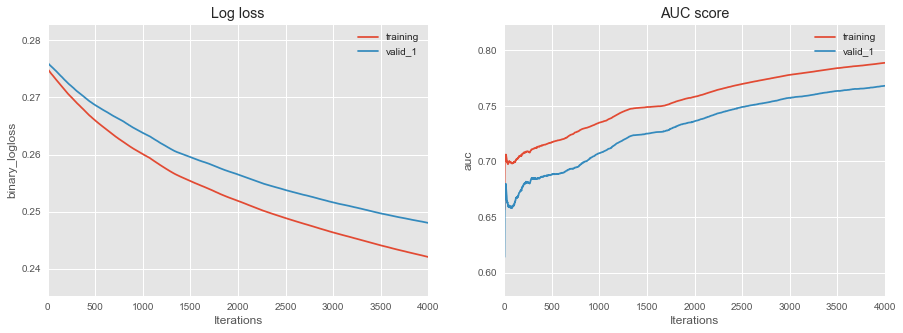

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
lbg.plot_metric(eval_result, metric='binary_logloss', ax=ax[0], title='Log loss')
lbg.plot_metric(eval_result, metric='auc', ax=ax[1], title='AUC score');

Text(0.5, 1.0, 'Biến quan trọng')

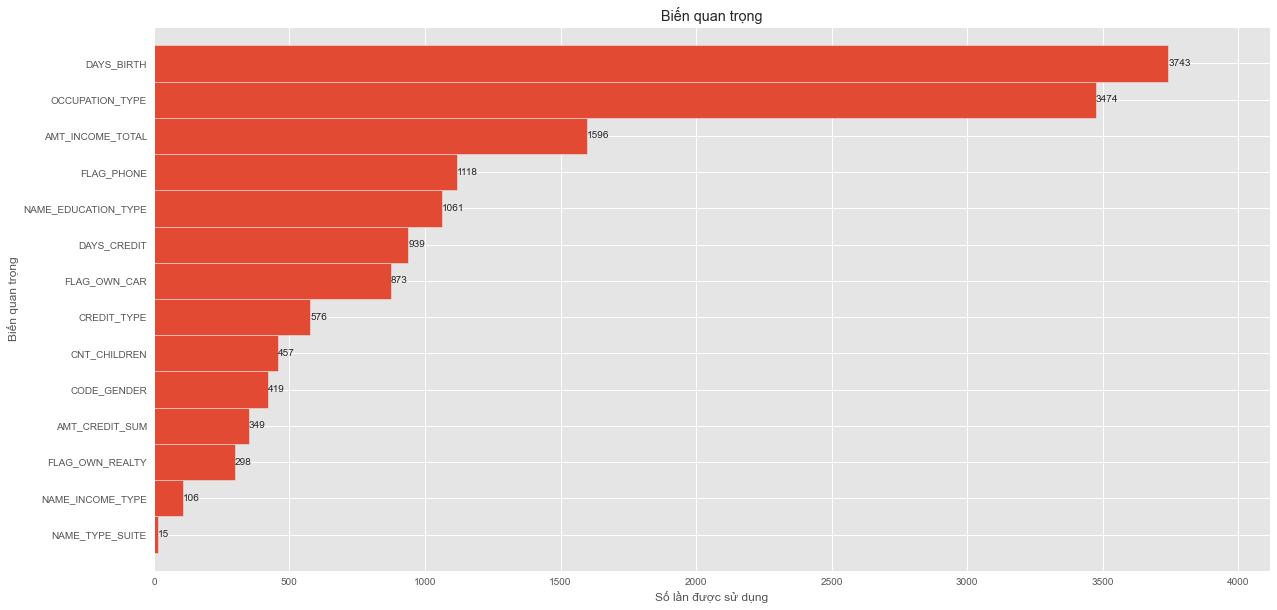

In [130]:
lbg.plot_importance(clf, precision=0, max_num_features=20, figsize=(20, 10), height=1)
plt.xlabel('Số lần được sử dụng')
plt.ylabel('Biến quan trọng')
plt.title('Biến quan trọng')

### 4.2 Random Forest

model score:80.63260869565218
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1472
           1       0.83      0.19      0.31       125

    accuracy                           0.93      1597
   macro avg       0.88      0.59      0.64      1597
weighted avg       0.93      0.93      0.91      1597



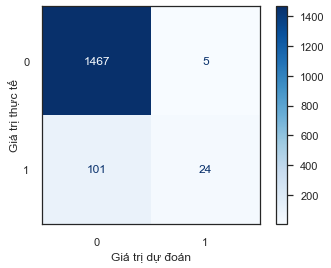

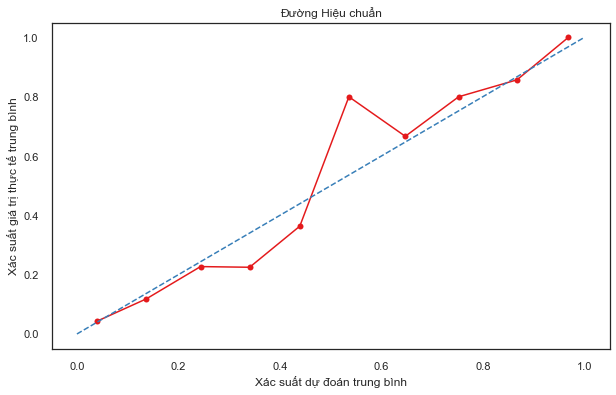

In [100]:
numeric_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'DAYS_BIRTH','FLAG_PHONE','FLAG_EMAIL', 'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CREDIT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
random_forest = RandomForestClassifier(random_state= 5,
                                      n_estimators=150, 
                                              max_depth=5, 
                                              min_samples_split=4,
                                              min_samples_leaf=5)

clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(random_forest, cv=5, method='isotonic'
                                                            ))])


randomforest = clf_rf.fit(X_train, y_train)

auc_rf = roc_auc_score(y_test.values, clf_rf.predict_proba(X_test)[:, 1]) * 100
print(f"model score:{auc_rf}")

y_predict_rf = clf_rf.predict_proba(X_test)[:, 1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_predict_rf)

print(classification_report(y_test, clf_rf.predict(X_test)))

confusion_matrix = plot_confusion_matrix(clf_rf, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.grid(False)
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')


y_predicted = clf_rf.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Xác suất dự đoán trung bình')
plt.ylabel('Xác suất giá trị thực tế trung bình')
plt.title('Đường Hiệu chuẩn')

plt.show()


In [39]:
X_train.shape

(6386, 18)

In [40]:
data.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CREDIT_TYPE,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,1,M,Y,Y,1,Consumer credit,180000.0,Unaccompanied,Commercial associate,Secondary / secondary special,-16195,0,1,Laborers,-2921,0,0,69885.0,0.0
1,0,F,N,Y,0,Credit card,90000.0,Unaccompanied,Working,Secondary / secondary special,-20543,0,0,Sales staff,-2920,0,0,225000.0,0.0
3,0,F,N,Y,0,Consumer credit,247500.0,Unaccompanied,Commercial associate,Higher education,-14881,0,0,Accountants,-2918,0,0,36900.0,0.0
4,0,M,N,N,0,Consumer credit,202500.0,Unaccompanied,Working,Higher education,-17552,0,0,Laborers,-2918,0,0,58941.0,0.0
5,0,F,Y,Y,0,Consumer credit,157500.0,Unaccompanied,State servant,Secondary / secondary special,-17889,0,1,Laborers,-2917,0,0,127813.5,0.0


### 4.3 Gradient Boosting

AUC score:97.9767569842349
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1471
           1       0.85      0.64      0.73       126

    accuracy                           0.96      1597
   macro avg       0.91      0.82      0.86      1597
weighted avg       0.96      0.96      0.96      1597



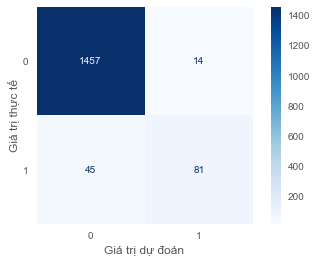

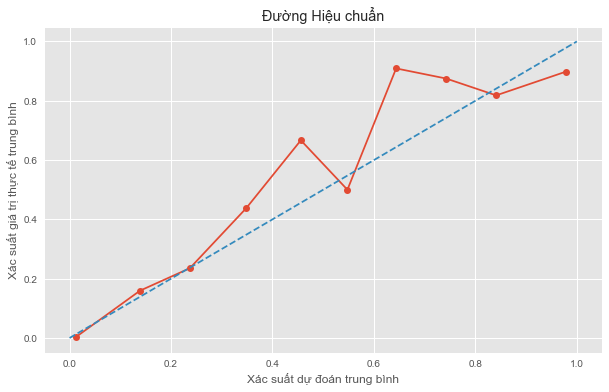

In [41]:
numeric_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'DAYS_BIRTH','FLAG_PHONE','FLAG_EMAIL', 'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CREDIT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
GradientBoosting = GradientBoostingClassifier(n_estimators=250, 
                                              max_depth=4, 
                                              min_samples_split=60,
                                              min_samples_leaf=50,
                                              max_features=0.8
)
    
clf_gb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(GradientBoosting, cv = 5, method = 'isotonic'
                                                            ))])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='TARGET'),data[('TARGET')] , test_size=0.2,
                                                    random_state=0)

clf_gb.fit(X_train, y_train)
auc_gb = roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:, 1]) * 100
print(f"AUC score:{auc_gb}")

y_predict_gb = clf_gb.predict_proba(X_test)[:, 1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_predict_gb)

print(classification_report(y_test, clf_gb.predict(X_test)))

plot_confusion_matrix(clf_gb, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.grid(False)
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')

y_predicted = clf_gb.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Xác suất dự đoán trung bình')
plt.ylabel('Xác suất giá trị thực tế trung bình')
plt.title('Đường Hiệu chuẩn')
plt.show()

AUC score:95.39213147302883
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1471
           1       0.83      0.42      0.56       126

    accuracy                           0.95      1597
   macro avg       0.89      0.71      0.76      1597
weighted avg       0.94      0.95      0.94      1597



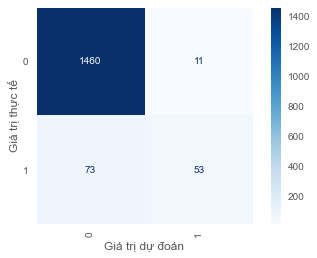

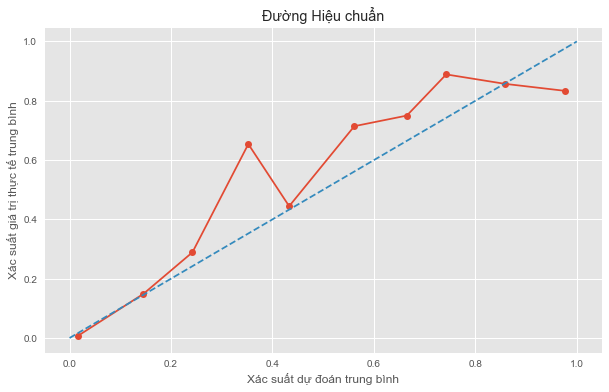

In [42]:
numeric_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'DAYS_BIRTH','FLAG_PHONE','FLAG_EMAIL', 'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CREDIT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
GradientBoosting = GradientBoostingClassifier(n_estimators=250, 
                                              max_depth=3, 
                                              min_samples_split=150,
                                              min_samples_leaf=80,
                                                  max_features=0.8
)
    
clf_gb1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(GradientBoosting, cv = 5, method = 'isotonic'
                                                            ))])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='TARGET'),data[('TARGET')] , test_size=0.2,
                                                    random_state=0)

clf_gb1.fit(X_train, y_train)
auc_gb1 = roc_auc_score(y_test, clf_gb1.predict_proba(X_test)[:, 1]) * 100
print(f"AUC score:{auc_gb1}")

y_predict_gb1 = clf_gb1.predict_proba(X_test)[:, 1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_predict_gb1)

print(classification_report(y_test, clf_gb1.predict(X_test)))

plot_confusion_matrix(clf_gb1, X_test, y_test,
                                 cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.grid(False)
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')

y_predicted = clf_gb1.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Xác suất dự đoán trung bình')
plt.ylabel('Xác suất giá trị thực tế trung bình')
plt.title('Đường Hiệu chuẩn')
plt.show()

In [44]:
print("GD train accuracy: %0.3f" % clf_gb1.score(X_train, y_train))
print("GD test accuracy: %0.3f" % clf_gb1.score(X_test, y_test))

GD train accuracy: 0.966
GD test accuracy: 0.947


### 4.4 Decision Tree

AUC score:88.63180214301902
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1471
           1       0.83      0.04      0.08       126

    accuracy                           0.92      1597
   macro avg       0.88      0.52      0.52      1597
weighted avg       0.92      0.92      0.89      1597



<ipython-input-46-2f53b1f33cd3>:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


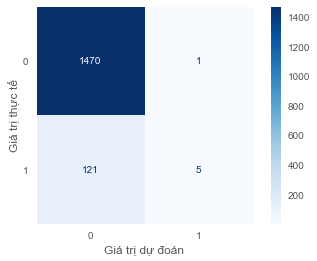

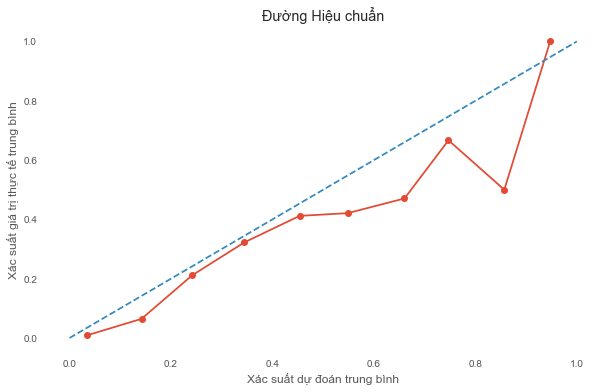

In [46]:
numeric_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'DAYS_BIRTH','FLAG_PHONE','FLAG_EMAIL', 'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CREDIT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
DecisionTree = DecisionTreeClassifier(random_state=15,
                                          max_depth=10, 
                                          min_samples_split=110,
                                          min_samples_leaf=50
)
    
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(DecisionTree, cv = 5, method = 'isotonic'
                                                            ))])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='TARGET'),data[('TARGET')] , test_size=0.2,
                                                    random_state=0)

clf_dt.fit(X_train, y_train)
auc_dt = roc_auc_score(y_test, clf_dt.predict_proba(X_test)[:, 1]) * 100
print(f"AUC score:{auc_dt}")

y_predict_dt = clf_dt.predict_proba(X_test)[:, 1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_predict_dt)

print(classification_report(y_test, clf_dt.predict(X_test)))

plot_confusion_matrix(clf_dt, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.grid(False)
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')

y_predicted = clf_dt.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Xác suất dự đoán trung bình')
plt.ylabel('Xác suất giá trị thực tế trung bình')
plt.title('Đường Hiệu chuẩn')
ax = plt.axes()
ax.set_facecolor("white")
plt.show()

### 4.5 Logistic

AUC score:69.6508152320525
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1471
           1       0.00      0.00      0.00       126

    accuracy                           0.92      1597
   macro avg       0.46      0.50      0.48      1597
weighted avg       0.85      0.92      0.88      1597



D:\Documents\GitHub\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Documents\GitHub\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Documents\GitHub\Anacoda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

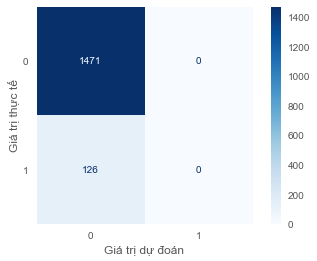

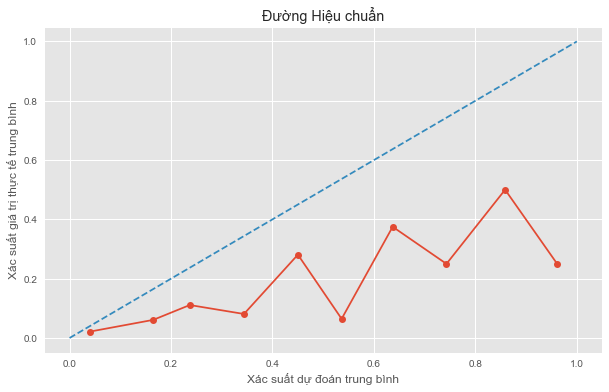

In [113]:
numeric_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'DAYS_BIRTH','FLAG_PHONE','FLAG_EMAIL', 'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CREDIT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

Logistic = LogisticRegression(tol=0.002, C= 2, max_iter=200, random_state= 5, n_jobs= 60)

clf_logit = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(Logistic, cv = 5, method = 'isotonic'
                                                            ))])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='TARGET'),data[('TARGET')] , test_size=0.2,
                                                    random_state=0)

clf_logit.fit(X_train, y_train)
auc_logit = roc_auc_score(y_test, clf_logit.predict_proba(X_test)[:, 1]) * 100
print(f"AUC score:{auc_logit}")

y_predict_logit = clf_logit.predict_proba(X_test)[:, 1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_predict_logit)

print(classification_report(y_test, clf_logit.predict(X_test)))

plot_confusion_matrix(clf_logit, X_test, y_test,
                                 cmap=plt.cm.Blues)
plt.grid(False)
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')

y_predicted = clf_logit.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Xác suất dự đoán trung bình')
plt.ylabel('Xác suất giá trị thực tế trung bình')
plt.title('Đường Hiệu chuẩn')
pyplot.show()

In [ ]:
y_train

In [56]:
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [57]:
y_predicted

array([0.06598573, 0.        , 0.00484848, ..., 0.07734261, 0.07585552,
       0.04579482])

## 5. ROC Curve

<ipython-input-58-a22e800d2a78>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes()
<ipython-input-58-a22e800d2a78>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


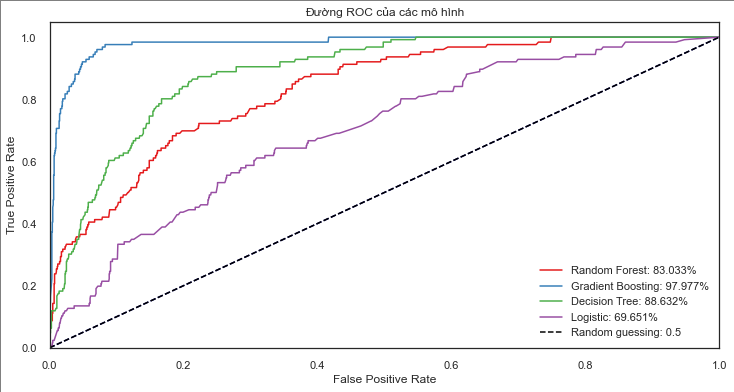

In [58]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
#plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Random Forest: " + str(round(auc_rf, 3)) + "%")
plt.plot(fpr2, tpr2, label= "Gradient Boosting: "+ str(round(auc_gb, 3)) + "%")
plt.plot(fpr3, tpr3, label= "Decision Tree: " + str(round(auc_dt, 3)) + "%")
plt.plot(fpr4, tpr4, label= "Logistic: "+ str(round(auc_logit, 3)) + "%")
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
#plt.plot(fpr5, tpr5, label= "Gradient Boosting 1")
plt.legend(loc='best')
plt.axes()
#plt.xlabel("FPR")

#plt.ylabel("TPR")
#plt.title('Receiver Operating Characteristic')
#plt.show()
ax = plt.axes()
ax.set_facecolor("white")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường ROC của các mô hình')
plt.legend(loc="lower right")
plt.show()